In [1]:
### import libraries

import pandas as pd
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### User and resource attributes for each dataset

DS_ID = "IoT" # Availables => user_attributes.keys()
# OUT_FILE = open(DS_ID+".output", "w") # File to save the outputs

USER_ATTRS = {"IoT": ["role", "age", "health", "uname"],
              "AMZ": ["MGR_ID","ROLE_ROLLUP_1","ROLE_ROLLUP_2","ROLE_DEPTNAME","ROLE_TITLE","ROLE_FAMILY_DESC","ROLE_FAMILY","ROLE_CODE"],
              "HC": ["position", "uward", "specialties", "teams", "agentfor", "uname"],
              "UN": ["position","departmentu","crsTaken","crsTaught","isChair", "uname"],
              "PM": ["adminroles","projects","departmentu","projectsled","expertiseu","isemployee","task","uname"]}

RES_ATTRS = {"IoT": ["area", "mode", "temperature", "lockstatus", "rname"],
             "AMZ":["RID"],
             "HC": ["type", "author", "patient", "topics", "tratingTeam", "rward", "rname"],
             "UN": ["type","student","departmentr","csr", "rname"],
             "PM": ["type","project","department","expertise","proprietary", "rname"]}

EDG_ATTRS = {"IoT": ["uname", "rname", "location", "timeday", "op", "ACTION"],
             "AMZ": ["uname", "rname"],
             "HC": ["uname", "rname"],
             "UN":["uname", "rname"],
             "PM":["uname", "rname"]}

def get_probability_distribution(n, sample_size, probability_parameters, type="normal",):
    """ Get the probability distribution for n elementsin sample size."""
    distri = None

    if type==None:
        return None

    if type=="normal":
        distri = np.random.normal(probability_parameters["mu"], 
                                  probability_parameters["sigma"], 
                                  size=sample_size)        

    if type=="pareto":        
        distri = (np.random.pareto(probability_parameters["alpha"], sample_size) + 1) * probability_parameters["mu"]        

    if type=="poisson":
        distri = np.random.poisson(probability_parameters["lam"],
                                   size=sample_size)        

    if type=="exponential":
        new_scale = 1 / probability_parameters["lam"]
        # Generate values for the x-axis
        x = np.linspace(0, n, sample_size)
        # Calculate the PDF with the new scale parameter
        distri = expon.pdf(x, scale=new_scale)

    if type=="uniform":
        distri = np.random.uniform(probability_parameters["low"],
                                   probability_parameters["high"],
                                   size=sample_size)

    count, _, _ = plt.hist(distri, n)  
    return count/sample_size

def get_sample_by_distribution(access_log, sample_size, prob_distri, class_name):
    """ Sampling a dataframe based on a given distribution. """
    new_sample = pd.DataFrame() # Store all access requests
    for i in prob_distri.iloc:
        temp = access_log[access_log[class_name]==i[0]]
        n_samples = int(i[1]*sample_size)        
        temp = temp.sample(n=n_samples, replace=True)
        new_sample = pd.concat([new_sample, temp])

    return new_sample

In [7]:
### Load bipartite network

str_dataset = "AMZ"
str_distri = "Ex"

bip_network = ig.read("../data/"+str_dataset+"/binet-"+str_dataset+"-"+str_distri+".gml")
print(bip_network.summary())

IGRAPH UNWT 10717 9560 -- 
+ attr: id (v), name (v), ranking (v), type (v), weight (e)


In [25]:
sorted(user_nodes["ranking"])

[4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125345318e-05,
 4.12320125

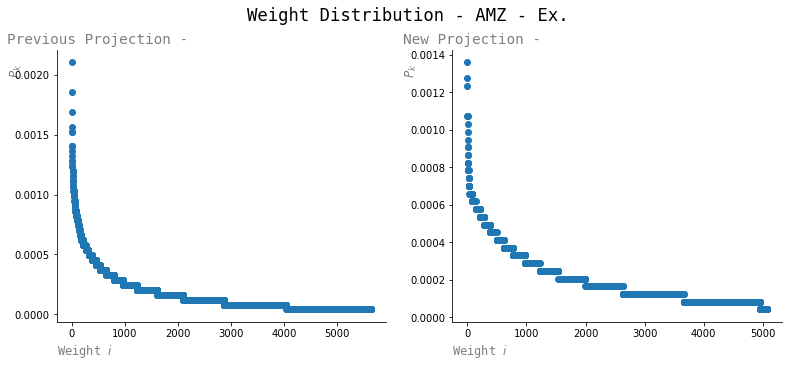

In [28]:
fig, ax = plt.subplots(1,2,figsize=(13, 5))

user_nodes = bip_network.vs.select(type=0)
res_nodes = bip_network.vs.select(type=1)

ax[0].spines[['right', 'top']].set_visible(False)
#ax[0].hist(user_nodes["ranking"], bins=len(user_nodes), edgecolor='black')
ax[0].plot(range(len(user_nodes)), sorted(user_nodes["ranking"], reverse=True), "o", ls="None")
ax[0].set_xlabel('Weight $i$', loc="left", size="large", family='monospace',
                 alpha=0.5, parse_math=True)
ax[0].set_ylabel('$P_k$', loc="top", size="large", family='monospace',
                 alpha=0.5, parse_math=True)
ax[0].yaxis.set_label_coords(-0.1,0.95)
ax[0].set_title("Previous Projection - ", loc='left', size="x-large",
                family='monospace', x=-0.15, y=1, alpha=0.5)

ax[1].spines[['right', 'top']].set_visible(False)
#ax[1].hist(idk, bins=20, edgecolor='black')
ax[1].plot(range(len(res_nodes)), sorted(res_nodes["ranking"], reverse=True), "o", ls="None")
ax[1].set_xlabel('Weight $i$', loc="left", size="large", family='monospace',
                 alpha=0.5, parse_math=True)
ax[1].set_ylabel('$P_k$', loc="top", size="large", family='monospace',
                 alpha=0.5, parse_math=True)
ax[1].yaxis.set_label_coords(-0.1,0.95)
ax[1].set_title("New Projection - ", loc='left', size="x-large",
                family='monospace', x=-0.15, y=1, alpha=0.5)

plt.suptitle("Weight Distribution - "+ str_dataset + " - " + str_distri + ".",
             size="xx-large", family='monospace', x=0.5, y=1)
plt.show()